<a href="https://colab.research.google.com/github/lindseyvanosky/machine_learning/blob/main/LV_American_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Selecting a Data Set

###Import, Upload & Inspect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.font_manager
from matplotlib import ticker as mticker
import matplotlib as mpl

filename = "/content/drive/MyDrive/Coding Dojo/02 Stack 2: Intro to Machine Learning/Data Sets/adult.data"
df = pd.read_csv(filename, header = None, skipinitialspace = True) #I noticed that some of my df had whitespace in it, so I referenced GeeksforGeeks to learn skipinitialspace
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


####Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###Questions

Source: [Kaggle](https://www.kaggle.com/datasets/danielbethell/adult-incomes-in-the-united-states?select=adult.names)
<br>
This data was extracted from the census bureau [database.](http://www.census.gov/ftp/pub/DES/www/welcome.html)

Description: This data set contains demographics on the American people in order to determine if they make more that $50K



Target: Income

Classification or Regression? Classification! Does this person make more than $50k yes, or no?

Features: Age, Sex, Education, Job Type, Family, Race

How many rows? 32560

Potential Challenges: One challenge I see with this data set is that it does not have a header, so we will have to rename each column to make it make sense. 

#Data Cleaning

####Dictionary from Kaggle


- age
- workclass (eg. private, local-gov, never-worked…)
- fnlwgt (the number of people the census believes the entry represents)
- education
- education-num
- marital-status
- occupation
- relationship
- race
- gender
- capital-gain
- capital-loss
- hours-per-week
- native country
- outcome (whether the individual makes more than $50,000 annually

###Renaming Columns 

####Code:

In [ ]:
df = df.rename(columns = {0 : "age", 1 : "workclass", 2 : "fnlwgt", 3 : "education", 4 : "education_num", 5 : "marital_status", 6 : "occupation", 7 : "relationship", 8 : "race", 9 : "gender", 10 : "capital_gain", 11 : "capital_loss", 12 : "hours_per_week", 13 : "native_country", 14 : "outcome"})

In [ ]:
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


##Duplicates, NaN & Inconsistencies

####Duplicates

In [ ]:
df.duplicated().sum()

24

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

####Missing Data

In [ ]:
df.isna().sum()
#we have no missing values - for now.

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
outcome           0
dtype: int64

###Value Counts

####Age

In [ ]:
df["age"].value_counts(ascending = False).to_frame()
#all values consistent

,age
36,898
31,888
34,886
23,876
33,875
...,...
83,6
88,3
85,3
86,1


####Workclass

In [ ]:
df["workclass"].value_counts(ascending = False).to_frame()
df["workclass"].replace({"?" : "Other"}, inplace = True)

In [ ]:
df["workclass"].value_counts(ascending = False)
#all values consistent

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Other                1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

####Fnlwgt

In [ ]:
df["fnlwgt"].value_counts(ascending = False).to_frame()
#all values consistent

,fnlwgt
164190,13
123011,13
203488,13
148995,12
113364,12
...,...
138342,1
158040,1
232784,1
325573,1


####Education

In [ ]:
df["education"].value_counts(ascending = False).to_frame()
#all values consistent

,education
HS-grad,10494
Some-college,7282
Bachelors,5353
Masters,1722
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,645
Prof-school,576


####Education Num

In [ ]:
df["education_num"].value_counts(ascending = False).to_frame()
#all values consistent. However, this column doesn't really provide much information, so as long as it isn't a strong correlation, we will be dropping this column.

,education_num
9,10494
10,7282
13,5353
14,1722
11,1382
7,1175
12,1067
6,933
4,645
15,576


####Marital Status

In [ ]:
df["marital_status"].value_counts(ascending = False).to_frame()
#all values consistent

,marital_status
Married-civ-spouse,14970
Never-married,10667
Divorced,4441
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


####Occupation

In [ ]:
df["occupation"].value_counts(ascending = False).to_frame()
#considering we already have a value called "other - service" we will change the "?" values to NaN and correct them upon imputation. 
df["occupation"] = df["occupation"].replace("?", "unknwn")
df["occupation"].value_counts()
#all values consistent

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
unknwn               1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

####Relationship

In [ ]:
df["relationship"].value_counts(ascending = False).to_frame()
#all values consistent

,relationship
Husband,13187
Not-in-family,8292
Own-child,5064
Unmarried,3445
Wife,1568
Other-relative,981


####Race

In [ ]:
df["race"].value_counts(ascending = False).to_frame()
#all values consistent

,race
White,27795
Black,3122
Asian-Pac-Islander,1038
Amer-Indian-Eskimo,311
Other,271


####Gender

In [ ]:
df["gender"].value_counts(ascending = False).to_frame()
#all values consistent

,gender
Male,21775
Female,10762


####Capital Gain

In [ ]:
df["capital_gain"].value_counts(ascending = False).to_frame()
#all values consistent

,capital_gain
0,29825
15024,347
7688,284
7298,246
99999,159
...,...
1111,1
2538,1
22040,1
4931,1


####Capital Loss

In [ ]:
df["capital_loss"].value_counts(ascending = False).to_frame()
#all values consistent

,capital_loss
0,31018
1902,202
1977,168
1887,159
1848,51
...,...
2080,1
1539,1
1844,1
2489,1


####Hours Per Week

In [ ]:
df["hours_per_week"].value_counts(ascending = False).to_frame()
#all values consistent

,hours_per_week
40,15204
50,2817
45,1823
60,1475
35,1296
...,...
82,1
92,1
87,1
74,1


####Native Country

In [ ]:
df["native_country"].value_counts(ascending = False).to_frame()
df["native_country"] = df["native_country"].replace("?", "Other")
df["native_country"].value_counts()
#all values consistent

United-States                 29153
Mexico                          639
Other                           582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

####Outcome

In [ ]:
df["outcome"].value_counts(ascending = False).to_frame()
#all values consistent

,outcome
<=50K,24698
>50K,7839


#Univariate Visualizations

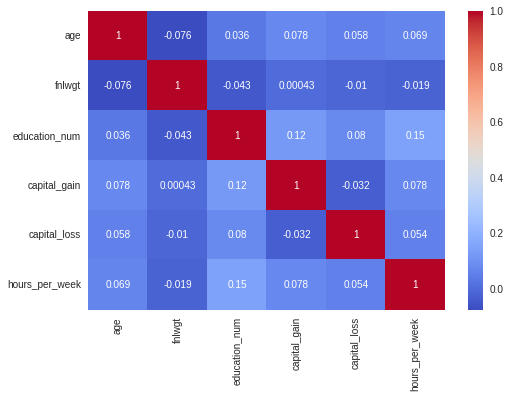

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = "coolwarm");

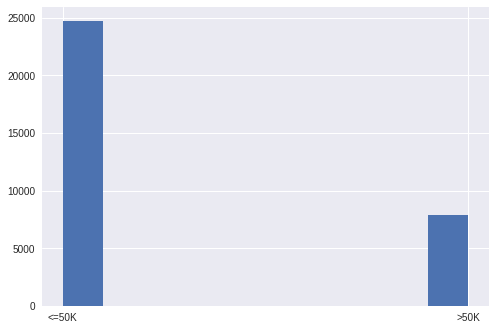

In [ ]:
plt.hist(df["outcome"]);

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
outcome           0
dtype: int64

#Explanatory Visuals

##Line Plot

In [ ]:
df["outcome"].replace({">50K" : 1, "<=50K" : 0}, inplace = True)

pos_filter = df["outcome"] == 1
pos_df = df.loc[pos_filter, :]
pos_df = pos_df.groupby(["race"])["outcome"].sum()

In [ ]:
neg_filter = df["outcome"] == 0 
neg_df = df.loc[neg_filter, :]
neg_df = neg_df.groupby(["race"])["outcome"].value_counts()
neg_df.head()

race                outcome
Amer-Indian-Eskimo  0            275
Asian-Pac-Islander  0            762
Black               0           2735
Other               0            246
White               0          20680
Name: outcome, dtype: int64

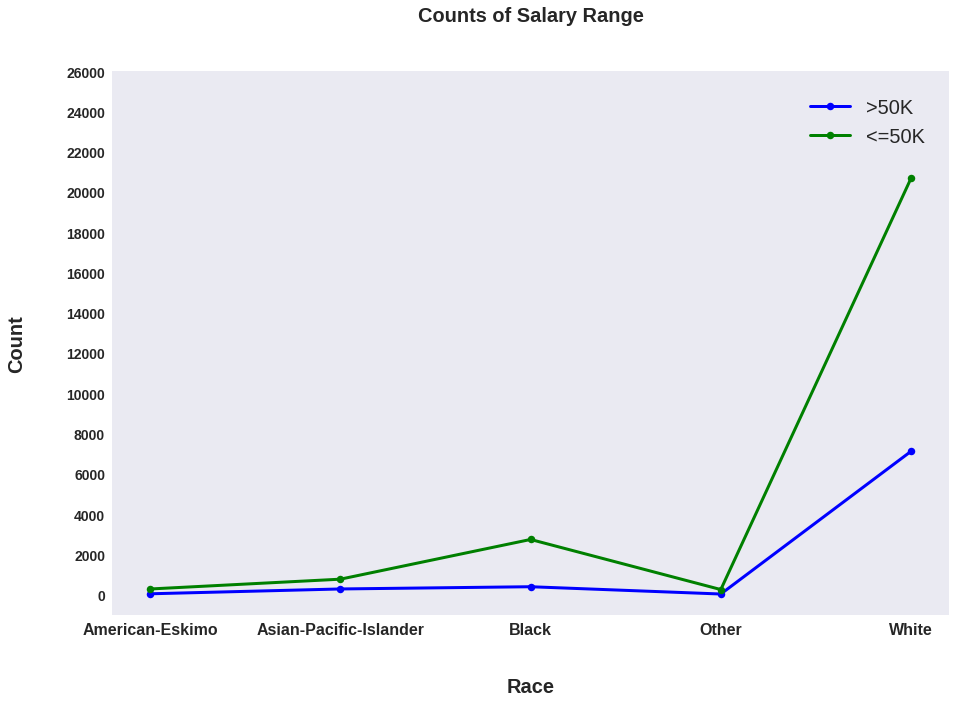

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
pos_df.plot(kind = "line", x = "race", y = "outcome", marker = ".", markersize = 15, lw = 3, color = "blue", label = ">50K");
neg_df.plot(kind = "line", x = "race", y = "outcome", marker = ".", markersize = 15, lw = 3, color = "green", label = "<=50K");


plt.tick_params(axis = "both", which = "major", labelsize = 14);
plt.xticks(fontweight = "bold", fontfamily = "sans-serif", fontsize = 16)
plt.yticks(fontweight = "bold", fontfamily = "sans-serif")
plt.title("Counts of Salary Range", fontsize = 20, fontweight = "bold", pad = 50, loc = "center", fontfamily = "sans-serif");
plt.xlabel("Race", fontsize = 20, fontweight = "bold", labelpad = 40, fontfamily = "sans-serif");
plt.ylabel("Count", fontsize = 20, fontweight = "bold", labelpad = 40, fontfamily = "sans-serif");
plt.yticks(np.arange(0, 27000, 2000));
plt.xticks([0, 1, 2, 3, 4], ["American-Eskimo", "Asian-Pacific-Islander", "Black", "Other", "White"])
plt.style.use("seaborn");
legend = plt.legend(fontsize = 20, borderaxespad = 5, loc = "upper right", bbox_to_anchor = (1.1, 1.15));
ax.grid(False);

##Bar Chart

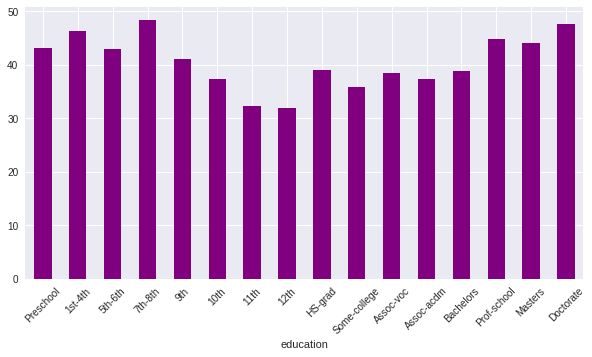

In [ ]:
df["education"] = pd.Categorical(df["education"], categories = ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Prof-school", "Masters", "Doctorate"], ordered = True)

age_df = df.groupby(["education"])["age"].mean()

fig, ax = plt.subplots(figsize = (10, 5))
age_df.plot(kind = "bar", x = "education", y = "age", color = "purple");
plt.xticks(rotation = 45);
